In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
random.seed(2023)

In [2]:
from nltk.stem import PorterStemmer,WordNetLemmatizer
import re
from nltk.tokenize import sent_tokenize, word_tokenize

In [3]:
from imblearn.over_sampling import RandomOverSampler

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
from nltk.corpus import stopwords
words = stopwords.words('english')

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/interactive cares/Resume.csv')
data.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [8]:
data.describe(include = 'all')

,ID,Resume_str,Resume_html,Category
count,2.484000e+03,2484,2484,2484
unique,NaN,2482,2482,24
top,NaN,STOREKEEPER II Professional Sum...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY
freq,NaN,2,2,120
mean,3.182616e+07,NaN,NaN,NaN
std,2.145735e+07,NaN,NaN,NaN
min,3.547447e+06,NaN,NaN,NaN
25%,1.754430e+07,NaN,NaN,NaN
50%,2.521031e+07,NaN,NaN,NaN
75%,3.611444e+07,NaN,NaN,NaN


In [71]:
data.isnull().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
Tokens         0
dtype: int64

In [9]:
list_to_remove = ['0','1','2','3','4','5','6','7','8','9','<','>',',','.','/','?',"|", "(" , ")" ,"{","}","[","]","-","_",'=',"+","*","&","^","%",'$','#','@',"!","`","~"]

In [10]:
data['Resume_str'][0]

"         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss pr

In [11]:
data.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


<Axes: >

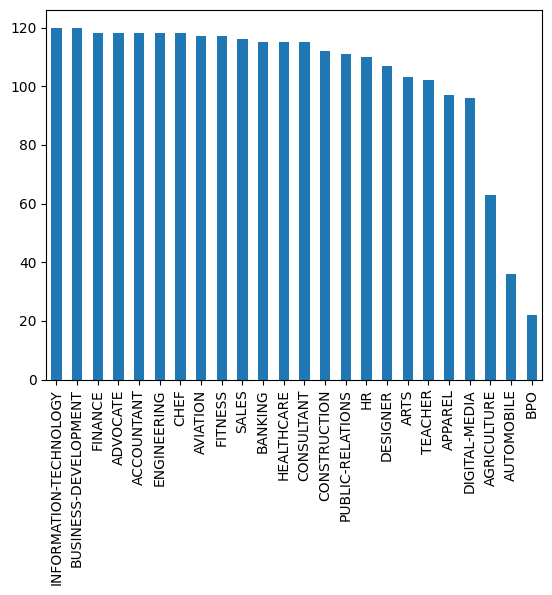

In [12]:
data['Category'].value_counts().plot.bar()

In [13]:
lem = WordNetLemmatizer()
stem = PorterStemmer()
def pre(s):
  # print(s)
  s = str(s).lower()
  s = re.sub(r'\d+',' ',s)
  s = re.sub(r'[^\w\s]',' ',s)
  s = re.sub(r'_',' ',s)
  s = s.split()
  st = [lem.lemmatize(val) for val in s]
  st = [stem.stem(val) for val in st]
  return st

In [14]:

data['Tokens'] = data['Resume_str'].apply(lambda x: word_tokenize(x))


In [15]:
def filter(li):
  filter_list = []
  for x in li:
    if x not in words:
      x = pre(x)
      if len(x) > 0:
         filter_list.append(x)
  return filter_list

In [16]:
data.head()

,ID,Resume_str,Resume_html,Category,Tokens
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[HR, ADMINISTRATOR/MARKETING, ASSOCIATE, HR, A..."
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,"[HR, SPECIALIST, ,, US, HR, OPERATIONS, Summar..."
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[HR, DIRECTOR, Summary, Over, 20, years, exper..."
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[HR, SPECIALIST, Summary, Dedicated, ,, Driven..."
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[HR, MANAGER, Skill, Highlights, HR, SKILLS, H..."


In [17]:
data['Tokens'] = data['Tokens'].apply(lambda x: filter(x))

In [18]:
data.head()

,ID,Resume_str,Resume_html,Category,Tokens
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[[hr], [administr, market], [associ], [hr], [a..."
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,"[[hr], [specialist], [u], [hr], [oper], [summa..."
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[[hr], [director], [summari], [over], [year], ..."
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[[hr], [specialist], [summari], [dedic], [driv..."
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[[hr], [manag], [skill], [highlight], [hr], [s..."


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


vector = CountVectorizer()
data['Tokens'] = data['Tokens'].apply(lambda skills: ' '.join([' '.join(skill) for skill in skills]))

count  = vector.fit_transform(data['Tokens'])


In [20]:
count_df = pd.DataFrame(count.toarray(), columns=vector.get_feature_names_out())


In [21]:
count_df.head()

,aa,aaa,aaae,aaahc,aaai,aac,aacc,aaccount,aacn,aacsb,...,zzxzx,µpg,çatalhöyük,école,ética,étiquett,éxito,òwaterfalló,último,ﬁlm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
data.shape

(2484, 5)

In [23]:
count_df.shape

(2484, 26847)

In [24]:
# test.shape

In [25]:
li = []
for col in count_df:
  x = count_df[count_df[col] > 0][col]
  pct = (len(x)*100/2484)
  if pct >= 5.0:
    li.append(col)
  # print(pct)

In [26]:
li.sort(reverse=True)

In [27]:
li

['york',
 'year',
 'wrote',
 'written',
 'write',
 'would',
 'world',
 'workshop',
 'workflow',
 'worker',
 'work',
 'word',
 'woman',
 'without',
 'within',
 'wire',
 'window',
 'win',
 'wide',
 'well',
 'weekli',
 'week',
 'websit',
 'web',
 'way',
 'water',
 'warehous',
 'walk',
 'volunt',
 'volum',
 'visual',
 'visit',
 'vision',
 'video',
 'vice',
 'via',
 'verifi',
 'verif',
 'verbal',
 'vendor',
 'vehicl',
 'variou',
 'varieti',
 'varianc',
 'valu',
 'valid',
 'util',
 'user',
 'use',
 'usa',
 'upon',
 'upgrad',
 'updat',
 'up',
 'univers',
 'unit',
 'uniqu',
 'understand',
 'type',
 'two',
 'turn',
 'trust',
 'troubleshoot',
 'trend',
 'treatment',
 'travel',
 'transport',
 'translat',
 'transit',
 'transfer',
 'transact',
 'trainer',
 'train',
 'traffic',
 'trade',
 'track',
 'toward',
 'total',
 'top',
 'tool',
 'took',
 'to',
 'titl',
 'time',
 'ticket',
 'throughout',
 'three',
 'thorough',
 'third',
 'think',
 'thi',
 'the',
 'th',
 'texa',
 'test',
 'territori',
 'termin'

In [28]:
count_df = count_df[li]

In [29]:
count_df.shape

(2484, 1116)

In [30]:
df = pd.concat([data,count_df],axis=1)

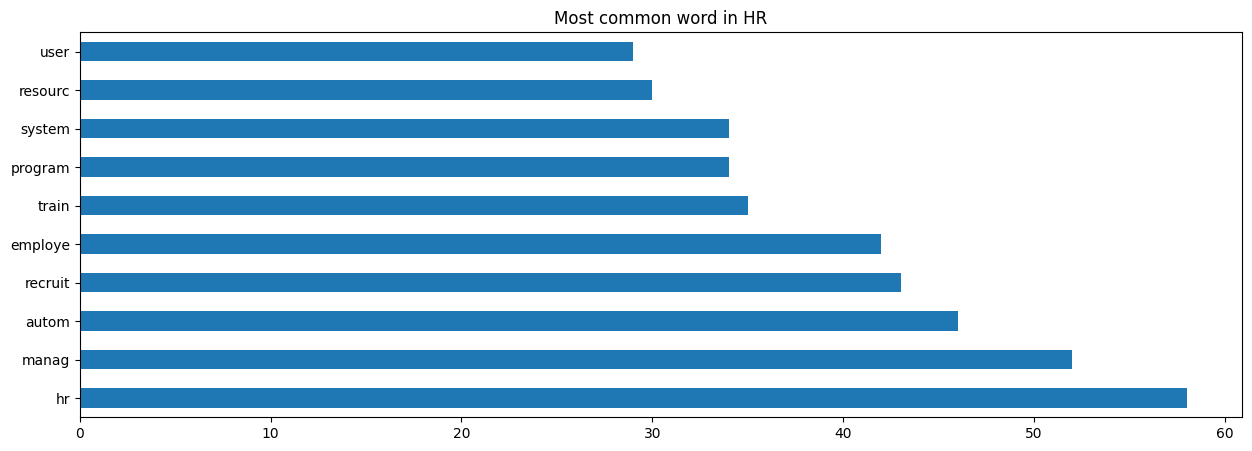

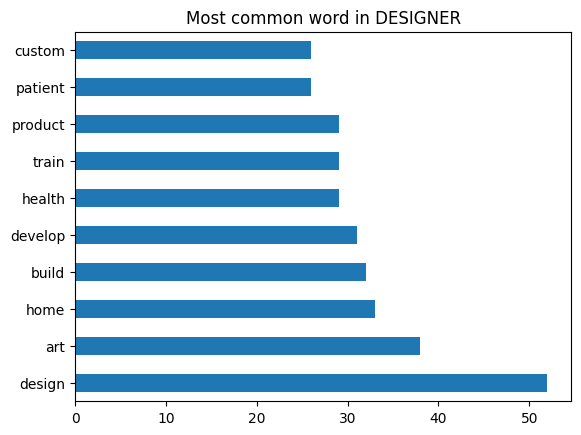

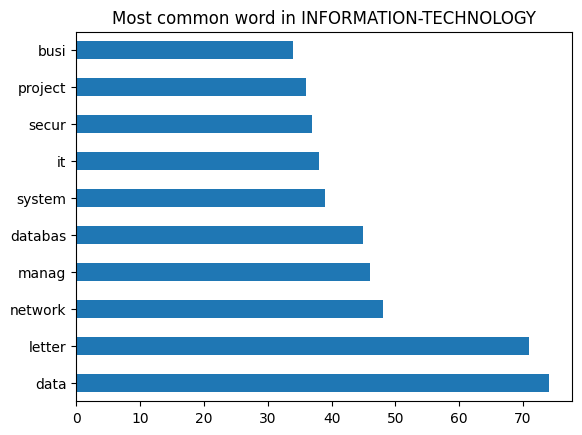

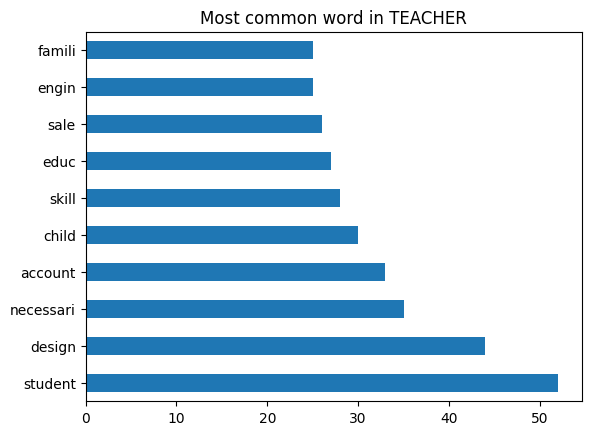

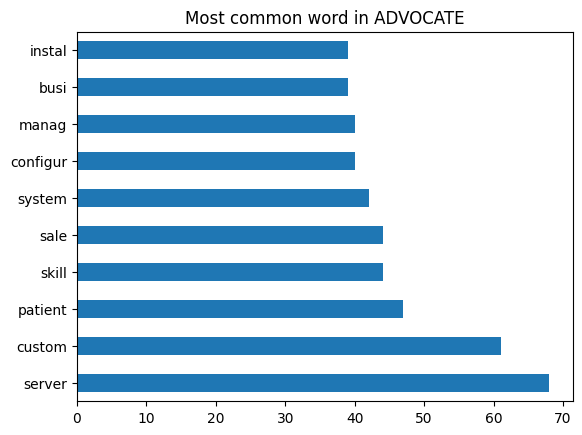

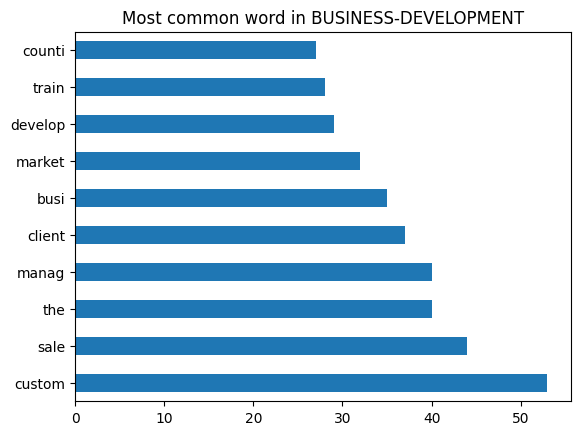

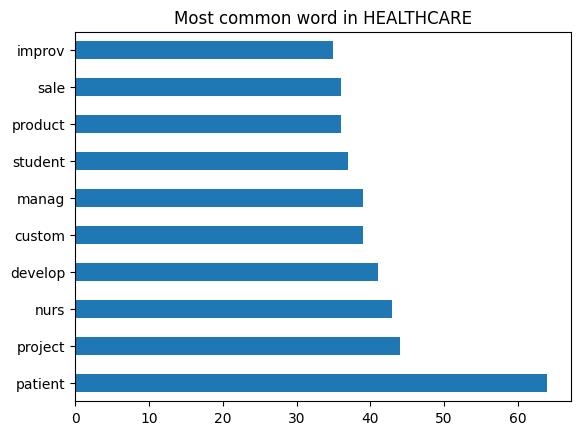

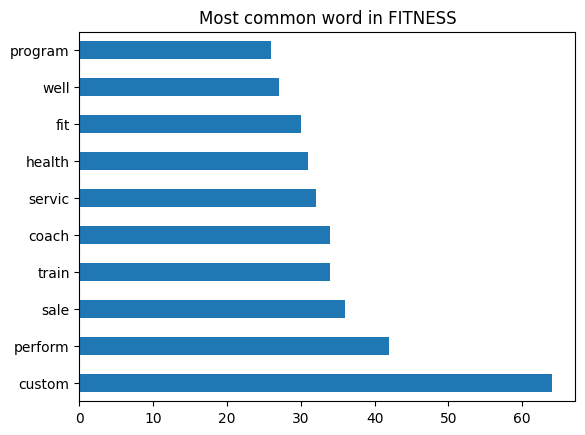

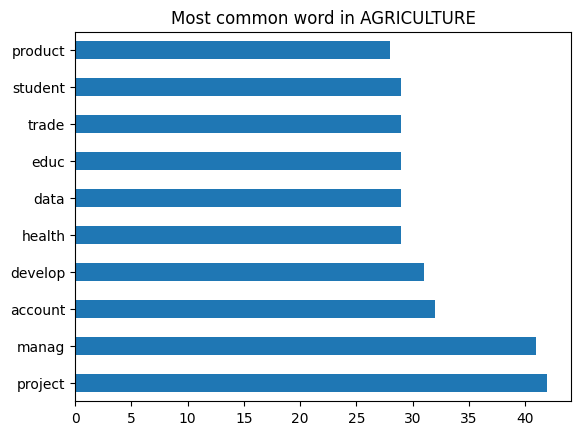

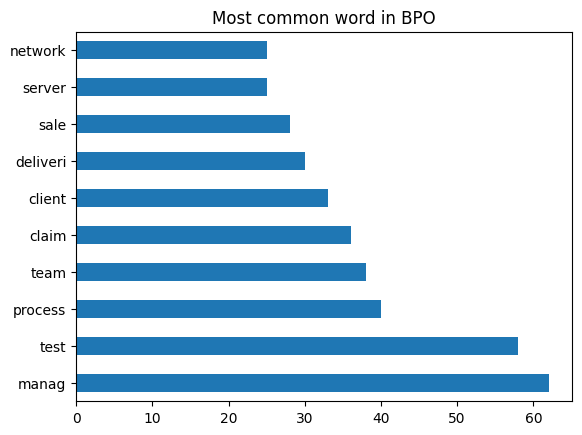

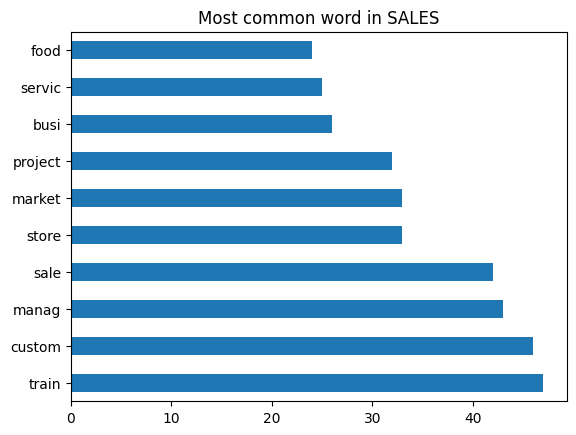

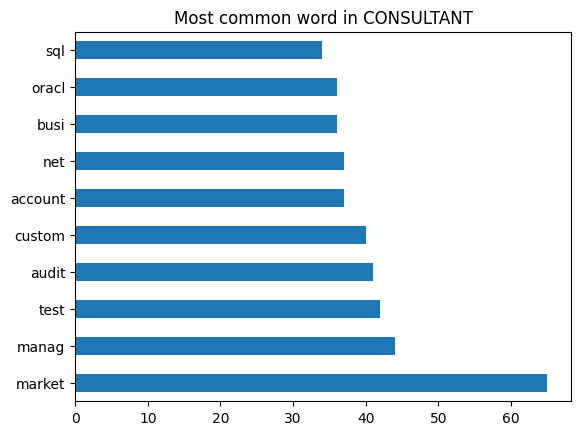

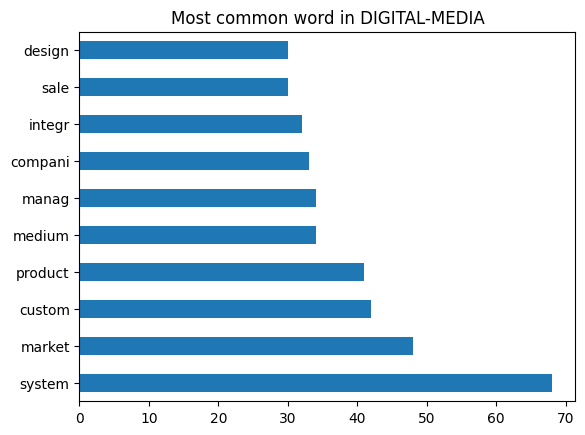

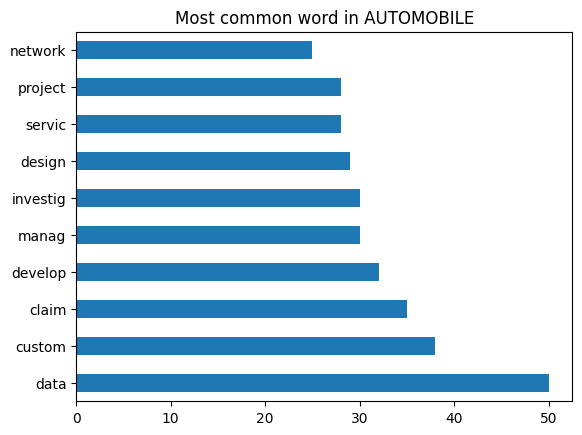

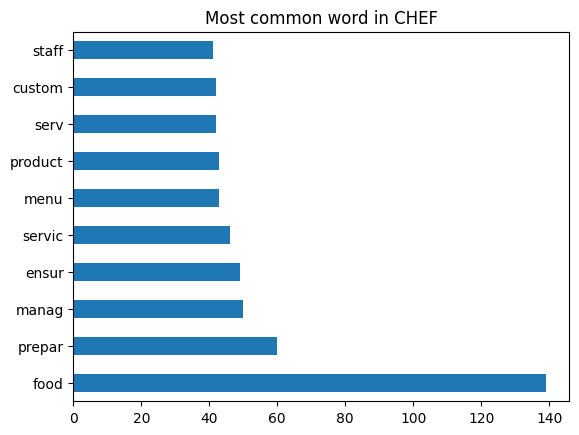

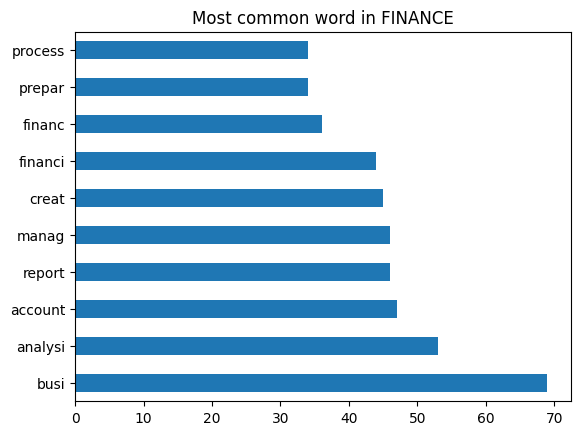

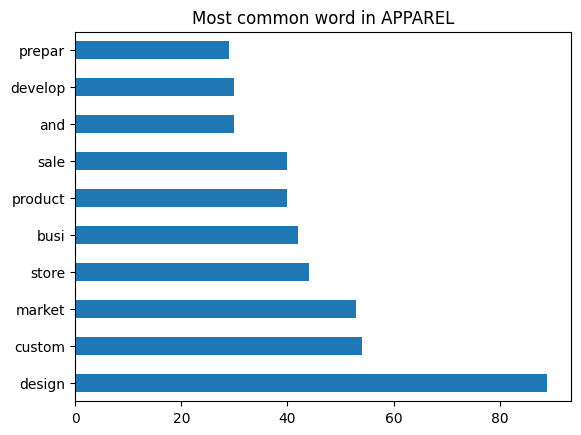

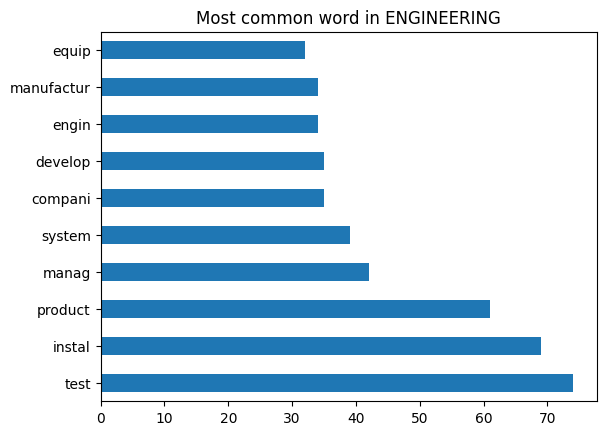

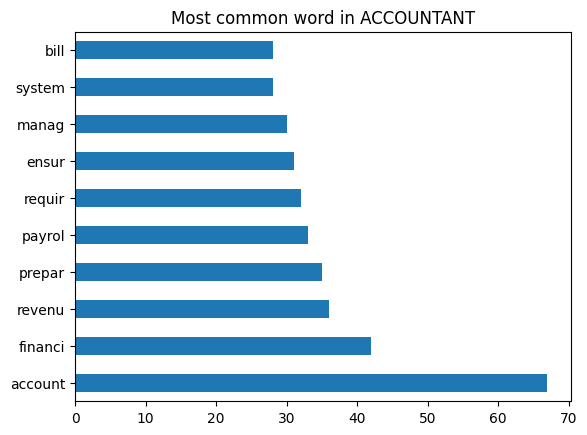

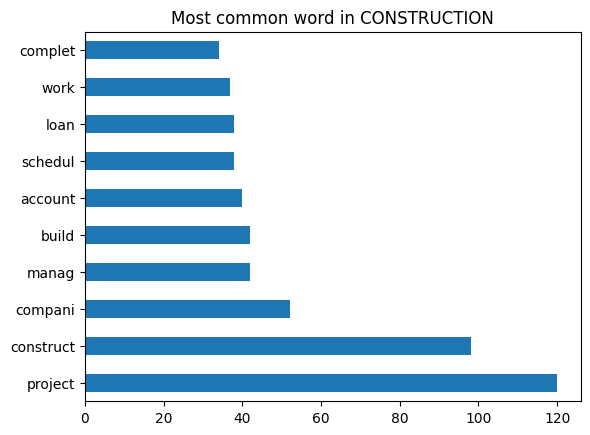

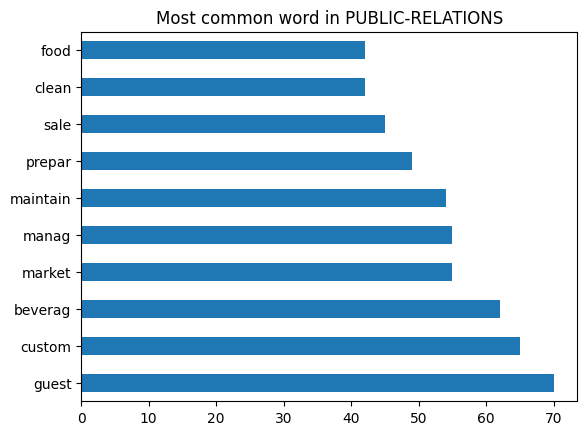

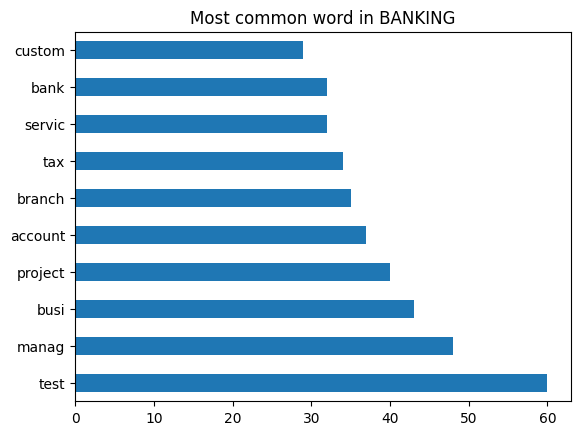

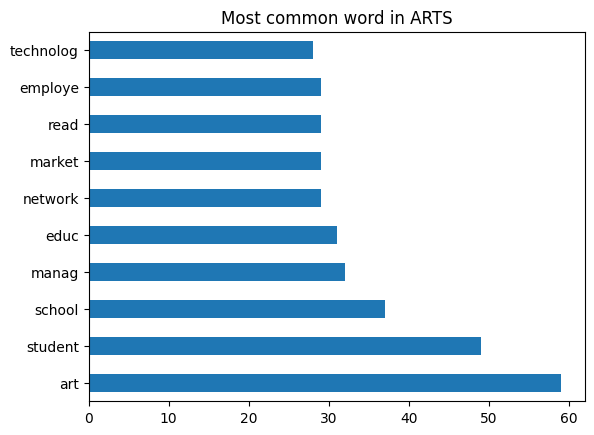

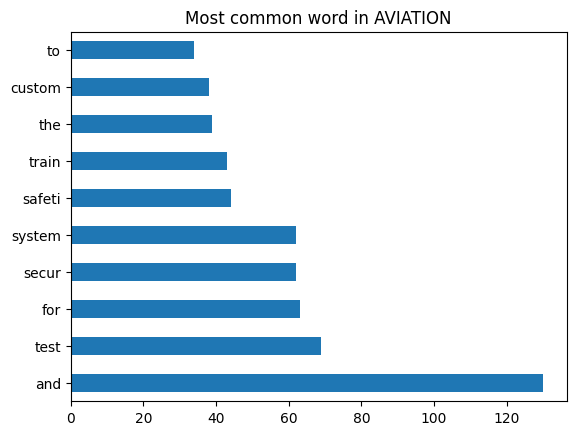

In [31]:
li = df['Category'].unique()

plt.figure(figsize = (15,5))
for i in li:
  cat_data = df[df['Category'] == i].drop(columns=['Category','ID','Resume_str','Resume_html','Tokens'])
  max_value = cat_data.max().sort_values(ascending = False)
  plt.title(f'Most common word in {i}')
  max_value[:10].plot.barh()
  plt.show()

  # print(max_value)


In [32]:
index_ = df['Category'].value_counts().index.values.tolist()

In [33]:
print(index_)

['INFORMATION-TECHNOLOGY', 'BUSINESS-DEVELOPMENT', 'FINANCE', 'ADVOCATE', 'ACCOUNTANT', 'ENGINEERING', 'CHEF', 'AVIATION', 'FITNESS', 'SALES', 'BANKING', 'HEALTHCARE', 'CONSULTANT', 'CONSTRUCTION', 'PUBLIC-RELATIONS', 'HR', 'DESIGNER', 'ARTS', 'TEACHER', 'APPAREL', 'DIGITAL-MEDIA', 'AGRICULTURE', 'AUTOMOBILE', 'BPO']


In [34]:
df.shape

(2484, 1121)

In [35]:
df.head(2)

,ID,Resume_str,Resume_html,Category,Tokens,york,year,wrote,written,write,...,account,accord,accomplish,accommod,access,accept,academi,academ,abl,abil
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr administr market associ hr administr summar...,0,1,0,0,0,...,2,0,2,0,0,0,0,0,0,0
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist u hr oper summari versatil mediu...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
def ind(x):
  # print(x)
  return index_.index(x)

df['Category'] = df['Category'].apply(lambda x: ind(x))



In [37]:
df = df.drop(columns =['ID','Resume_str','Resume_html','Tokens'])

In [38]:
df.head()

,Category,york,year,wrote,written,write,would,world,workshop,workflow,...,account,accord,accomplish,accommod,access,accept,academi,academ,abl,abil
0,15,0,1,0,0,0,0,0,0,0,...,2,0,2,0,0,0,0,0,0,0
1,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,5,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,15,0,1,0,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
4,15,0,1,1,0,0,0,0,2,0,...,0,1,0,0,2,0,0,0,0,0


In [39]:
df['Category'].value_counts()

0     120
1     120
2     118
3     118
4     118
5     118
6     118
7     117
8     117
9     116
10    115
11    115
12    115
13    112
14    111
15    110
16    107
17    103
18    102
19     97
20     96
21     63
22     36
23     22
Name: Category, dtype: int64

In [40]:
trainx = df.drop(columns = ['Category'])
trainy = df[['Category']]

In [41]:
trainx,testx, trainy, testy = train_test_split(trainx,trainy,test_size = 0.05)

In [42]:
feature, label = RandomOverSampler().fit_resample(trainx,trainy)

In [43]:
col_name = feature.columns
with open('col_name.txt','w') as f:
  for i in col_name:
    f.write(i+'\n')

In [44]:
print(len(col_name))

1116


In [45]:
label.value_counts()

Category
0           118
1           118
22          118
21          118
20          118
19          118
18          118
17          118
16          118
15          118
14          118
13          118
12          118
11          118
10          118
9           118
8           118
7           118
6           118
5           118
4           118
3           118
2           118
23          118
dtype: int64

In [46]:
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()


In [47]:
tree.fit(trainx,trainy)
forest.fit(trainx, trainy)


<ipython-input-47-96a34687c7a4>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(trainx, trainy)


RandomForestClassifier()

In [49]:
tree.score(testx, testy)

0.448

In [50]:
forest.score(testx, testy)


0.616

In [51]:
svc = SVC()
svc.fit(trainx,trainy)
svc.score(testx, testy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.464

In [53]:
tree_score = tree.predict(testx)
forest_score = forest.predict(testx)

In [54]:
from sklearn.metrics import f1_score, classification_report

In [55]:
tree_result = f1_score(testy,tree_score,average='macro')
forest_result = f1_score(testy,forest_score,average='macro')
# cat_result = f1_score(testy,forest_score,average='macro')

In [56]:
tree_result

0.44864290299072906

In [57]:
forest_result

0.5718394115419287

In [58]:
print(classification_report(testy, forest_score))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.00      0.00      0.00         2
           2       0.50      1.00      0.67         2
           3       0.80      0.73      0.76        11
           4       0.60      1.00      0.75         3
           5       0.86      0.86      0.86         7
           6       0.86      1.00      0.92         6
           7       0.67      0.67      0.67         6
           8       0.75      0.50      0.60         6
           9       0.33      0.25      0.29         8
          10       0.67      0.80      0.73         5
          11       0.00      0.00      0.00         7
          12       1.00      0.25      0.40         4
          13       0.50      1.00      0.67         4
          14       0.83      0.71      0.77         7
          15       0.67      1.00      0.80         8
          16       1.00      0.40      0.57         5
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier()

param_grid = {
    'n_estimators': [1000,1500],
    'max_depth' : [18,20,25],
    'n_jobs' :[-1]
}

grid = GridSearchCV(estimator=forest, param_grid=param_grid, cv= 5, scoring= 'f1_macro', return_train_score=False, verbose=1)
grid_search = grid.fit(feature, label)

print(grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

{'max_depth': 18, 'n_estimators': 1000, 'n_jobs': -1}


In [60]:
grid_search.best_score_

0.7486253731995636

In [61]:
pred = grid_search.predict(testx)

In [62]:
print(classification_report(testy, pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.20      0.50      0.29         2
           2       0.67      1.00      0.80         2
           3       0.89      0.73      0.80        11
           4       0.50      1.00      0.67         3
           5       0.75      0.86      0.80         7
           6       0.86      1.00      0.92         6
           7       0.83      0.83      0.83         6
           8       0.75      0.50      0.60         6
           9       0.50      0.25      0.33         8
          10       0.67      0.80      0.73         5
          11       0.20      0.29      0.24         7
          12       1.00      0.25      0.40         4
          13       0.57      1.00      0.73         4
          14       1.00      0.71      0.83         7
          15       0.78      0.88      0.82         8
          16       1.00      0.60      0.75         5
          17       0.00    

In [63]:
import joblib

In [68]:
joblib.dump(grid_search,'/content/drive/MyDrive/Colab Notebooks/interactive cares/rf3.joblib',protocol = 2,compress =3 )

['/content/drive/MyDrive/Colab Notebooks/interactive cares/rf3.joblib']

In [69]:
model = joblib.load('/content/drive/MyDrive/Colab Notebooks/interactive cares/rf3.joblib')

In [70]:
model.predict(testx)

array([11, 20, 21, 14, 11, 15, 18, 11,  0,  7, 19,  3,  4,  1,  3, 10,  1,
        5, 11,  4, 10,  1, 18,  9,  3, 15,  3,  6,  3,  5,  8,  9, 15, 12,
       18, 13, 18,  6, 11,  4,  6, 14,  0, 16,  3,  2,  3,  3, 13, 10,  7,
       17,  0,  7, 15,  5,  4, 10,  9,  1,  5,  5,  8, 14, 15, 18,  4, 15,
       18, 10,  0, 15, 20, 11, 20, 22, 18,  7,  7, 11, 14, 11,  6, 18, 11,
        5, 15, 22, 16,  2,  4,  6, 20,  5, 13,  0,  9,  1,  3,  0,  0, 13,
       16, 13, 18,  8, 20,  6, 20, 14, 18, 18,  8, 13, 11,  5, 18,  7,  2,
       15, 13,  6, 18, 10, 20])